<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/main/recosntru%C3%A7%C3%A3o_teste01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt

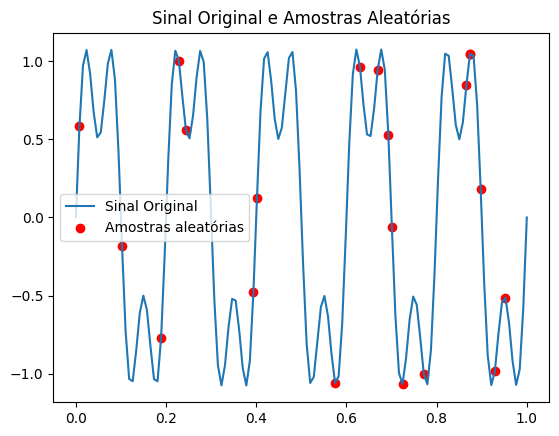

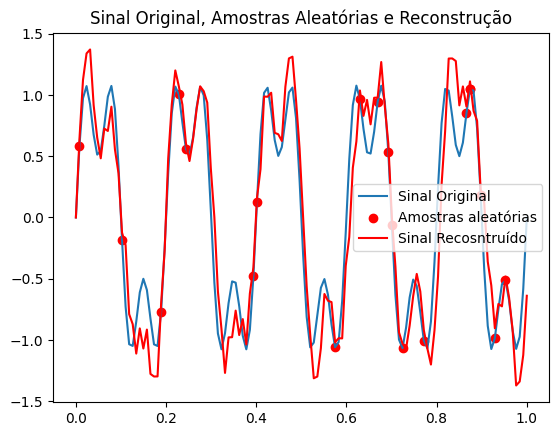

In [42]:
n = 128
t = np.linspace(0.0, 1.0 , num=n)
f1 = 5
f2 = 15

x = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)

p = 20
amostras_aleatorias = np.round((n-1)*np.random.rand(p)).astype(int)
y = x[amostras_aleatorias]

plt.plot(t, x, label ='Sinal Original ')
plt.scatter(t[amostras_aleatorias], y, color='red', label = 'Amostras aleatórias')
plt.title('Sinal Original e Amostras Aleatórias')
plt.legend()
plt.show()

Phi = np.fft.fft(np.eye(n, n))
CPhi = np.imag(Phi[amostras_aleatorias, :])

from sklearn.linear_model import OrthogonalMatchingPursuit

def omp(Phi, u, s):
  omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs = s)
  omp_model.fit(Phi, u)
  return omp_model.coef_

s_reconstruido = omp(CPhi, y, 10)

x_rec = np.imag(np.fft.fft(s_reconstruido))

plt.plot(t, x, label ='Sinal Original ')
plt.scatter(t[amostras_aleatorias], y, color='red', label = 'Amostras aleatórias')
plt.plot(t, x_rec, 'r', label ='Sinal Recosntruído')
plt.title('Sinal Original, Amostras Aleatórias e Reconstrução')
plt.legend()
plt.show()

